### What is Fuel Economy?
Excerpt from Wikipedia page on Fuel Economy in Automobiles:

The fuel economy of an automobile is the fuel efficiency relationship between the distance traveled and the amount of fuel consumed by the vehicle. Consumption can be expressed in terms of volume of fuel to travel a distance, or the distance travelled per unit volume of fuel consumed.

In this project we'll be analyzing fuel economy data provided by the US EPA (Environmental Protection Agency). Our Main goal is to determine Factors that defines whether a particular vehicle or vehicle class is economical or not in terms of fuel comsumption

We will be using information gathered from two Fuel economy datasets provided by the EDA (Year 2008 and 2018)

### Fuel Economy Data
This information is provided by the U.S. Environmental Protection Agency, Office of Mobile Sources, National Vehicle and Fuel Emissions Laboratory.

Below are the Various attributes(variables) covered in both datasets. Majority of the attributes are common to both datasets while some are just particular to one of them. At the end of this table a note was added differentiating the attributes that are particular to both and those that are not


| Attribute	| Description |
|:---: | :---:|  
| Model	| Vehicle make and model|
|Displ	|Engine displacement - the size of an engine in liters
|Cyl |	The number of cylinders in a particular engine
|Trans|	Transmission Type and Number of Gears
Drive	|Drive axle type (2WD = 2-wheel drive, 4WD = 4-wheel/all-wheel drive)
Fuel	|Fuel Type
Cert Region*	|Certification Region Code
Sales Area**	|Certification Region Code
Stnd	|Vehicle emissions standard code
Stnd Description*	|Vehicle emissions standard description
Underhood ID	|This is a 12-digit ID number that can be found on the underhood emission label of every vehicle. It's required by the EPA to designate its "test group" or "engine family." This is explained more here
Veh Class|	EPA Vehicle Class
Air Pollution Score	|Air pollution score (smog rating)
City MPG|	Estimated city mpg (miles/gallon)
Hwy MPG	|Estimated highway mpg (miles/gallon)
Cmb MPG|	Estimated combined mpg (miles/gallon)
Greenhouse Gas Score|	Greenhouse gas rating
SmartWay	|Yes, No, or Elite
Comb CO2*	|Combined city/highway CO2 tailpipe emissions in grams per mile

 `* Not included in 2008 dataset`
 
 `** Not included in 2018 dataset`

## Accessing The Data

##### load the datasets saved in the current folder
##### `all_alpha_08.csv` and `all_alpha_18.csv`

In [1]:
#import all needed libraries and load the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df_08 = pd.read_csv('all_alpha_08.csv')
df_18 = pd.read_csv('all_alpha_18.csv')


In [2]:
#check the first 3 rows to have a look at the data
df_08.head(3)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no


In [3]:
#check the first 3 rows to have a look at the data
df_18.head(3)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402


 ##### First we need to check fthe info of the datasets and get a general overview on the datasets before we begin to dicve deep into specific investigtions

In [4]:
#check for info
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [5]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

##### Next, we check into specifcs about their datatypes

In [6]:
#check the data types
df_08.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [7]:
df_18.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

##### The above shows us that there are a few issues with our datatypes and we will have to fix them as we proceed, for now, we need to scan through the data for other potetial errors such as missing values, duplicate values, unmatching column names, unnecessary columns and the likes. So we will keep these in mind as we continue to scan througth the datasets


##### Next, we need to check for missing values in both datasets

In [8]:
#check for missing values in 2008 dataset
df_08.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [9]:
#check for missing values in 2018 dataset
df_18.isnull().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

##### We can see that in the 2008 dataset we have 199 missinfg values in `Cyl` , `Trans` , `FE Calc Appr`, `City MPG`, `Hwy MPG`, `Cmb MPG`, `Unadj Cmb MPG`, `Greenhouse Gas Score` columns and we will need to fix them later



##### We can also see that in the 2018 dataset we have 199 missinfg values in `Cyl`, `dspl` columns and we will need to fix them too later



##### Next, we will need to check for duplicate rows on both datasets



In [10]:
#check if there are duplicated rows in 2008 dataset
df_08.duplicated().sum().any()

True

In [11]:
#check if there are duplicated rows in 2018 dataset
df_18.duplicated().sum().any()

False

In [12]:
#check for the actual number of duplicate rows in 20008

df_08.duplicated().sum()

25

In [13]:
#check for the actual number of duplicate rows in 2018

df_18.duplicated().sum()

0

##### From the above, we can seee that the 2008 has 25 duplicate rows in it while the 2018 have no duplicate rows.

##### Next, we need to check for unique values in the both datesets

In [14]:
#check for unique values in 2008

df_08.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [15]:
#check for unique values in 2018

df_18.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

In [16]:
#ceck the shape for the 2008 dataset
df_08.shape

(2404, 18)

In [17]:
#ceck the shape for the 2018 dataset
df_18.shape

(1611, 18)

##### We have seen the number of unique values in each of our columns and if for any reason, we will be doing without any of the values, we will find out as we proceed.

##### Next we want to compare the column names/headers for the two datasets and then check to see the columns we will be renaming to match 


In [18]:
#check for column names by calling a single row out of the 2008 dataset
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no


In [19]:

#check for column names by calling a single row out of the 2018 dataset
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386


##### From the above we have seen that we have to change the column name `Sales Area` to `Cert Region`


##### Also we have a clue on the columns we need to drop for each of the dataset i.e columns that are not needed for our anlysis 

##### 2008 - `Stnd`	`Underhood ID`	`FE Calc Appr` `Unadj Cmb MPG`

##### 2018 - `Stnd`	`Stnd Description`	`Underhood ID`  `Comb CO2`

## Cleaning the Data

##### The next set of steps will be centered on cleaning our data and making it t fit for analysis at the final stage.

##### We will start by renaming the columns in detail.

##### we need to change `Sales Area` in 2008 datset to `cert region`

##### then we will change all column headers to lowercase letters in all and replace all spaces with`_`

In [20]:
#to rename Sales Area column in 2008 to cert region
df_08 = df_08.rename(columns ={'Sales Area' : 'cert region'})

In [21]:
#confirm the change
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,cert region,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no


##### Next we need to drop unncesary columns in our datasets

In [22]:
#drop unneccesary columns in 2008 dataset
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr' ,'Unadj Cmb MPG'], axis =1, inplace = True)

In [23]:
#confirm
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,cert region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [24]:
#drop unneccesary columns in 2018 dataset
df_18.drop(['Stnd','Stnd Description', 'Underhood ID', 'Comb CO2'], axis =1, inplace = True)

In [25]:
#confirm
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


##### Now, our both datasets have the same column names and there are no longer unnecesarry columns in the datset any longer

##### Next, we need replace all column headers/names having space with `_` for the sake of sonme operations that we will be performing later. In addition to that we shall be making all headers lowercase

In [26]:
#to replace space with '_' and change all in the 2008 dataset
df_08.rename(columns = lambda x :x.strip().lower().replace(" ", "_"), inplace = True)

In [27]:
#confirm 
df_08.head(0)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [28]:
#to replace space with '_' and change all in the 2018 dataset
df_18.rename(columns = lambda x :x.strip().lower().replace(" ","_"), inplace = True)

In [29]:
#confirm 
df_18.head(0)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [30]:
df_08.shape

(2404, 14)

In [31]:
df_18.shape

(1611, 14)

##### Next, since our focus is cars certified in Califonia we need to filter our dataset to cars only certified in califoria

In [32]:
#to check the list of unique values in the crt_region column
df_08.cert_region.unique()

array(['CA', 'FA', 'FC'], dtype=object)

In [33]:
#to check the list of unique values in the crt_region column
df_18.cert_region.unique()

array(['FA', 'CA'], dtype=object)

In [34]:
#to filter out the rows with califonia certification
df_08 =df_08.query('cert_region == "CA"')
df_18 = df_18.query('cert_region == "CA"')

In [35]:
#confirm  for 2008 datset
df_08.cert_region.unique()

array(['CA'], dtype=object)

In [36]:
#confirm  for 2018 datset
df_18.cert_region.unique()

array(['CA'], dtype=object)

In [37]:
#confrim the new shape of the 2008 dataest
df_08.shape

(1084, 14)

In [38]:
#confrim the new shape of the 2018 dataest
df_18.shape

(798, 14)

##### Next, we should drop te column `cert_region` since our dataset has been filtered in previous steps, we don't need it any more

In [39]:
df_08 = df_08.drop(columns = ['cert_region'])
df_18 = df_18.drop(columns = ['cert_region'])

In [40]:
#confirm thet teh columns have been removed
df_08.head(0)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [41]:
#confirm thet teh columns have been removed
df_18.head(0)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


##### Next we want to check, for rows with missing columns and remove those rows

In [42]:
#check for rows with missing values in 2008
df_08.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [43]:
#check for rows with missing values in 2018
df_18.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

##### Next, we will drop these rows because they are not useful for our analysis

##### 2008 - `trans` and `drive`

##### 2018 -  `displ` and `cyl`

##### Note: the moment we fix the missing value issues for `trans` column in 2008, the other columns (`cyl`, `city_mpg`, `hwy_mpg`and `cmb_mpg`) will be fixed.

In [44]:
#drop rows with missimg values in 2008 
df_08 = df_08.dropna(subset =['trans', 'drive'])

In [45]:
#confirm that they have been droped
df_08.isnull().sum()

model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [46]:
#drop rows with missimg values in 2018 
df_18 = df_18.dropna(subset =['displ', 'cyl'])

In [47]:
#confirm that they have been droped
df_18.isnull().sum()


model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [48]:
#check the new shape
df_08.shape

(1009, 13)

In [49]:
df_18.shape

(797, 13)

##### Next, we need to check for rows with duplicate values and drop them


In [50]:
#to chechfor rows with duplicate values  in 2008 dataset

df_08.duplicated().sum()

23

In [51]:
#to chechfor rows with duplicate values  in 2018 dataset

df_18.duplicated().sum()

3

In [52]:
#to drop the duplicates column in 2008
df_08 = df_08.drop_duplicates()

In [53]:
#to drop the duplicates column in 2018
df_18 = df_18.drop_duplicates()

In [54]:
#confirm that duplicates have been dropped in 2008
df_08.duplicated().sum().any()

False

In [55]:
#confirm that duplicates have been dropped in 2018
df_18.duplicated().sum().any()

False

In [56]:
#check the new shape
df_08.shape

(986, 13)

In [57]:
#check the new shape
df_18.shape

(794, 13)

##### Next, we will move on to fix data types 

> #### 2008 

##### model     `object` 

##### displ     `float64`

##### *cyl*                       from `object` to `int64`

##### trans    `object`

##### drive      `object`

##### fuel         `object`

##### veh_class         `object`

##### *air_pollution_score*    from  `object` `to float`

##### *city_mpg*                  from  `object` `to float`

##### *hwy_mpg*                   from  `object` `to float`

##### *cmb_mpg*                   from  `object` `to float`

##### *greenhouse_gas_score*      from  `object` `to int64`

##### smartway                 `object`




> #### 2018

##### model                    object

##### displ                   float64

##### *cyl*               from      `float64` to `int64`

##### trans                    object

##### drive                    object

##### fuel                     object

##### veh_class                object

##### air_pollution_score       `int64` to `float`

##### *city_mpg*              from    `object` to `float`

##### *hwy_mpg*                  from    `object` to `float`

##### *cmb_mpg*                  from    `object` to `float`

##### *greenhouse_gas_score*      from    `object` to `int64`

##### smartway                 object


##### First, we need to conver `cyl` column in 2008 dataset to `int` but there is an issue, the column was formatted as objects and data was writen into the column as objects so what we will do is to exract the numbers in each row for that column and then convert into `int`

In [58]:
#check the format of the cyl column in 2008
df_08.cyl.unique()

array(['(6 cyl)', '(4 cyl)', '(12 cyl)', '(8 cyl)', '(10 cyl)',
       '(16 cyl)', '(5 cyl)', '(2 cyl)'], dtype=object)

In [59]:
#to extract the numbers and convert to int
df_08.cyl = df_08['cyl'].str.extract('(\d+)')

In [60]:
#then convert to int
df_08.cyl = df_08.cyl.astype(int)

In [61]:
#confirm
df_08.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

##### Next we will attempt to convert `air_pollution_score` to int

##### But first we want to return the unique values in the the `air_pollution_score` column

In [62]:
#to find the unique values in 2008 air_pollution_score column
df_08.air_pollution_score.unique()

array(['7', '6', '9.5', '9', '6/4'], dtype=object)

##### As we can see that 6/4 is most likely the reason why the column was formatted as an object.

##### Let's open up that exact row to see what is going on

In [63]:
#to open up the row where air_pollution_score = 6/4 in 2008
df_08.query('air_pollution_score == "6/4"')

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


##### The reason is Because the vehicle uses two diferent sources of fuel and as such EDA assigns  two differnt values for each fuel source type. Also you will notice that irt is the same with `city_mpg`	`hwy_mpg`	`cmb_mpg`	`greenhouse_gas_score` 

##### So what we need to do is to create a seperate row for each of the value so we wont have two values on the same row

In [64]:
#firstlets view of the hybrid row
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [65]:
#then craete two copies of that hybrid

df1 = hb_08.copy()
df2 = hb_08.copy()

In [66]:
#then we will split the column so that the first value (value before the /) will be on the first row "df_1 " and the other value will be in the row'df_2


split_columns_1 = ['fuel', 'air_pollution_score', 'city_mpg' , 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

for c in split_columns_1:
    df1[c] = df1[c].apply(lambda x :x.split("/")[0])
    df2[c] = df2[c].apply(lambda x :x.split("/")[1])



In [67]:
#view the column for the newly seperated rows before the"/
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [68]:
#view the column for the newly seperated rows after the "/"
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [69]:
#append both rows together
new_row = df1.append(df2)

In [70]:
#view the new row
new_row

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [71]:
#drop the hybrid row
df_08.drop(hb_08.index, inplace = True)



In [72]:
#add in the new row
df_08 = df_08.append(new_row, ignore_index = True)

In [73]:
#check the new shape
df_08.shape

(987, 13)

##### Now, we can convert `air_pollution_score` `city_mpg`	`hwy_mpg`	`cmb_mpg`	`greenhouse_gas_score` to floats

In [74]:
#check the types before concersion
df_08.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [75]:
# convert 'air_pollution_score',  'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score' to floats
columns = ['air_pollution_score',  'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

for c in columns:
    df_08[c] = df_08[c].astype(float)

In [76]:
#convert greenhouse gas score back to int
df_08.greenhouse_gas_score = df_08.greenhouse_gas_score.astype(int)

In [77]:
#confirm the types
df_08.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int32
smartway                 object
dtype: object

In [78]:
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


##### Next, we will treat the next data set (2018) like we did with the 2008 dataset 


##### We will check for hybrids and seperate them into rows and then bring back into the dataframe

In [79]:
#check for the number of hybrid rows

df_18[df_18['fuel'].str.contains('/')].count()

model                   38
displ                   38
cyl                     38
trans                   38
drive                   38
fuel                    38
veh_class               38
air_pollution_score     38
city_mpg                38
hwy_mpg                 38
cmb_mpg                 38
greenhouse_gas_score    38
smartway                38
dtype: int64

In [80]:
#assign the hybrid rows to a variable name hb_18
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18.head(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6.0,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No


In [81]:
#create two copies

df3 = hb_18.copy()
df4 = hb_18.copy()

In [82]:
df3.head(3)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite


In [83]:
#then we will split the column so that the first value (value before the /) will be on the first row "df_1 " and the other value will be in the row'df_2


new_split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

In [84]:
for c in new_split_columns:
    df3[c] = df3[c].apply(lambda x :x.split("/")[0])
    df4[c] = df4[c].apply(lambda x :x.split("/")[1])

In [85]:
#confirm 
hb_18.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite


In [86]:
#confirm
hb_18.head(3)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite


In [87]:
#confirm 
df3.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
160,BMW 530e,2.0,4.0,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite


In [88]:
#confirm 
df4.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Electricity,small car,3,66,78,71,10,Yes
160,BMW 530e,2.0,4.0,SemiAuto-8,2WD,Electricity,small car,7,70,75,72,10,Elite


In [89]:
#append the two new data frames to form new rows
new_row_1 = df3.append(df4)

In [90]:
#confirm that the two rows have been appended (they must be 76)
new_row_1.shape

(76, 13)

In [91]:
#before we add the new_rows_1 to the  main dataframe, let's check the shape of the 2018 dataset before we add new rows to it
df_18.shape

(794, 13)

In [92]:
#also lets check for theshape of the hybrid rows so that we can confirm that no row is missing when we append
hb_18.shape

(38, 13)

In [93]:
#remove the hybrid rows because we do not later need them. note that the new shape of df_18 should be (794-38). that is832
df_18.drop(hb_18.index, inplace=True)

In [94]:

df_18.shape

(756, 13)

In [95]:
#then append the new rows to the df_18 dataframe. note that the whole dataframe shape should be 756+76 (832)
df_18 = df_18.append(new_row_1, ignore_index = True)

In [96]:
#confirm the shape
df_18.shape

(832, 13)

In [97]:
#confirm the shape now
df_18.shape

(832, 13)

##### Now, we can go on to fix the data types, let's check the data types first to know what we have to fix

In [98]:
df_18.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

##### We will change 

##### *cyl* from `float` to `int`

##### air_pollution_score* from `int` to `float`

##### *city_mpg*, *hwy_mpg*, *cmb_mpg* from `object` to `float` 

In [99]:
#converting the specific columns

df_18.cyl = df_18.cyl.astype(int)

df_18.greenhouse_gas_score = df_18.greenhouse_gas_score.astype(int)

df_18.air_pollution_score = df_18.air_pollution_score.astype(float)

df_18.city_mpg = df_18.city_mpg.astype(float)

df_18.hwy_mpg = df_18.hwy_mpg.astype(float)

df_18.cmb_mpg = df_18.cmb_mpg.astype(float)



In [100]:
#confirm the data types again
df_18.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int32
smartway                 object
dtype: object

In [101]:
#now confirm that df_08 and df_18 have the same data types
df_18.dtypes == df_08.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

NOW WE HAVE A CLEAN DATASET THAT WE CAN GO ON TO PERFORM OUR ANALYSIS AND EXPLORATION ON.



For the last time, let's check the shape and save the file


In [102]:
df_08.shape

(987, 13)

In [103]:
df_18.shape

(832, 13)

In [104]:
df_08.to_csv('clean_fuel_data_2008.csv', index=False)
df_18.to_csv('clean_fuel_data_2018.csv', index=False)

## Exploratory Data Analysis

Now, we will examine the distribution of some core columns and also their corellation with better fuel economy `(cmb_mpg)`

In [105]:
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


In [106]:
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No


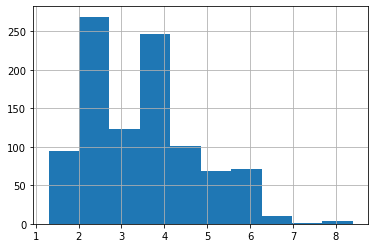

In [107]:
#distribution of 2008 displ (histogram)
df_08.displ.hist();

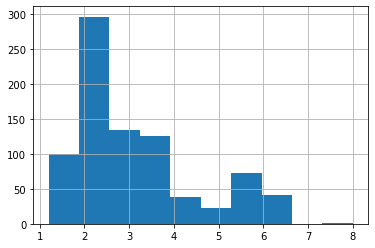

In [108]:
#distribution of 2018 displ (histogram)
df_18.displ.hist();

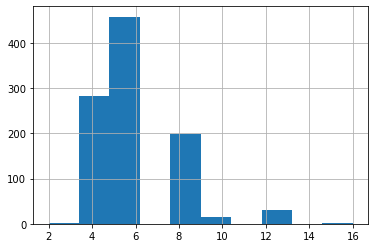

In [110]:
#distribution of 2008 cyl (histogram)
df_08.cyl.hist();

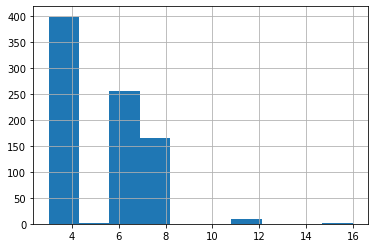

In [111]:
#distribution of 2018 cyl (histogram)
df_18.cyl.hist();

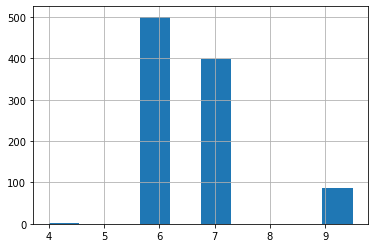

In [112]:
#distribution of 2008 air_pollution_score (histogram)
df_08.air_pollution_score.hist();

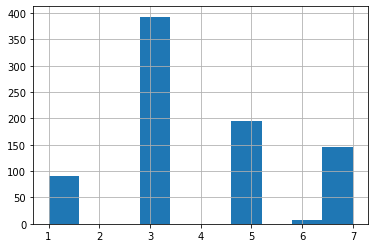

In [113]:
#distribution of 2018 air_pollution_score (histogram)
df_18.air_pollution_score.hist();

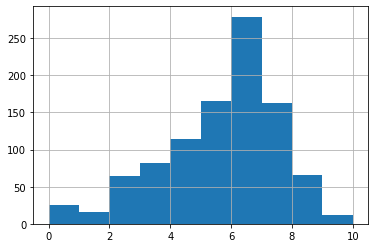

In [114]:
#distribution of 2008 greenhouse_gas_score (histogram)
df_08.greenhouse_gas_score.hist();

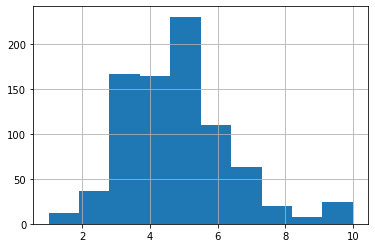

In [115]:
#distribution of 2018 greenhouse_gas_score (histogram)
df_18.greenhouse_gas_score.hist();

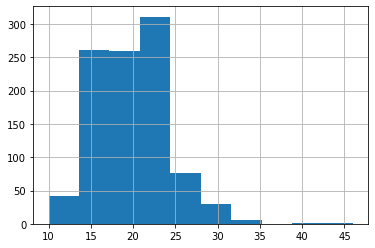

In [118]:
#distribution of 2008 cmb_mpg (histogram)
df_08.cmb_mpg.hist();

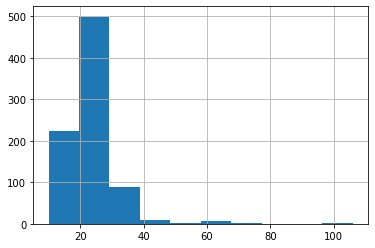

In [117]:
#distribution of 2018 cmb_mpg (histogram)
df_18.cmb_mpg.hist();

##### Now, we will begin to test for corelation between relevant parameters and the fuel economy (combined miled per gallon). we will do this using the scatter plot


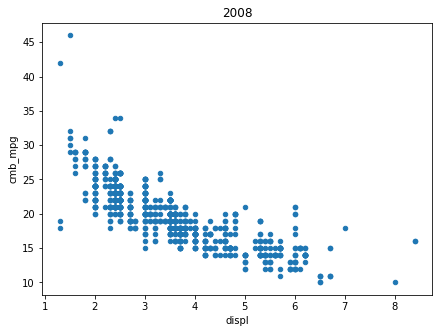

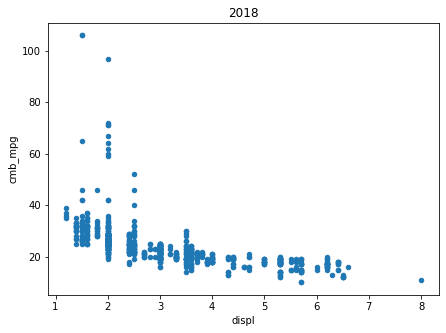

In [153]:
#to check for the corellation between engine displacement(size of engine in litres) and the combined miles per gallon in both dataset

df_08.plot.scatter(x = 'displ', y = 'cmb_mpg', figsize = (7,5), title ="2008");
df_18.plot.scatter(x = 'displ', y = 'cmb_mpg', figsize = (7,5), title ="2018");

##### The Plots above shows us there is a high and negative corelation between the engine displacement and the vehicles combined miles per gallon consumption in both dataset. This means that the biger the size of the engine, the lower the the miles per gallon consumption of the vehicles.

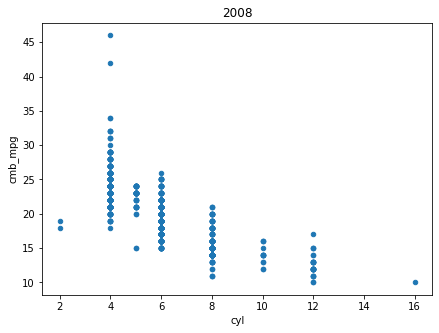

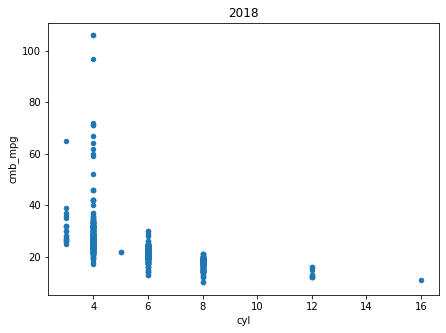

In [152]:
#to check for the corellation between number of cylinders and the combined miles per gallon both dataset

df_08.plot.scatter(x = 'cyl', y = 'cmb_mpg', figsize = (7,5), title ="2008");
df_18.plot.scatter(x = 'cyl', y = 'cmb_mpg', figsize = (7,5), title ="2018");

##### The Plots above shows us there is a high and negative corelation between the number of sylinders the vehicle has and the  vehicles combined miles per gallon consumption in both datasets. This means that the higher the number fo cylinders, the lower the the miles per gallon consumption of the vehicles.

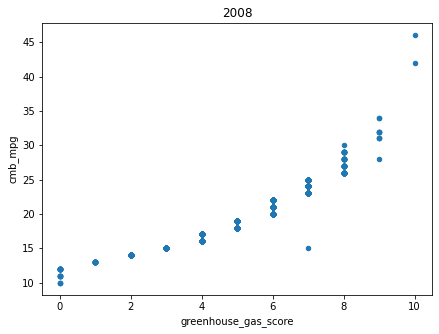

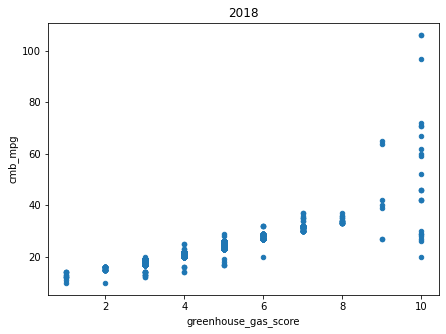

In [143]:
#to check for the corellation between number of greenhouse_gas_score and the combined miles per gallon both dataset

df_08.plot.scatter(x = 'greenhouse_gas_score', y = 'cmb_mpg', figsize = (7,5), title ="2008");
df_18.plot.scatter(x = 'greenhouse_gas_score', y = 'cmb_mpg', figsize = (7,5), title ="2018");

##### The Plots above shows us there is a high and positive corelation between the greenhouse_gas_score assigned to the vehicle and the vehicles combined miles per gallon consumption in both datasets. This means that the higher the greenouse gas score, the higher the the miles per gallon consumption of the vehicles.

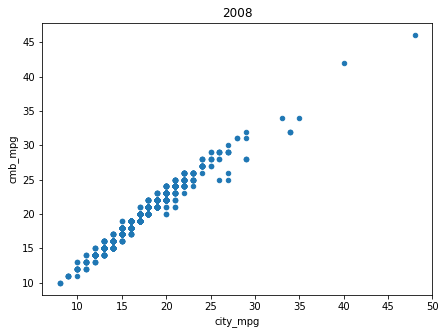

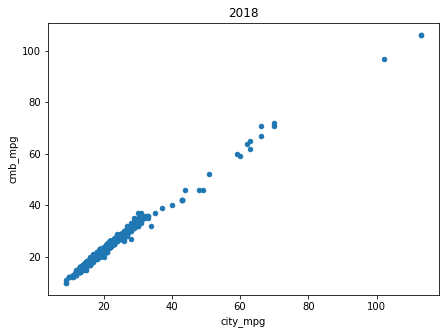

In [146]:
#to check for the corellation between city miles per gallon and the combined miles per gallon both dataset

df_08.plot.scatter(x = 'city_mpg', y = 'cmb_mpg', figsize = (7,5), title ="2008");
df_18.plot.scatter(x = 'city_mpg', y = 'cmb_mpg', figsize = (7,5), title ="2018");

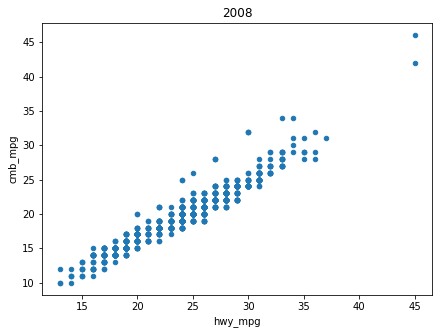

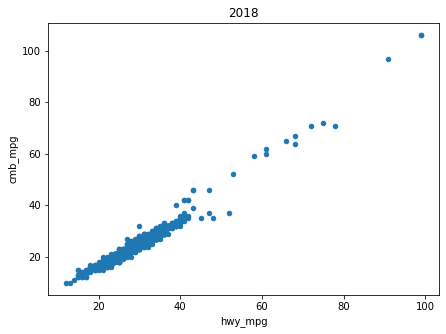

In [147]:
##to check for the corellation between highway miles per gallon and the combined miles per gallon both dataset
df_08.plot.scatter(x = 'hwy_mpg', y = 'cmb_mpg', figsize = (7,5), title ="2008");
df_18.plot.scatter(x = 'hwy_mpg', y = 'cmb_mpg', figsize = (7,5), title ="2018");

##### The 4 Plots above shows us there is a high and positive corelation between the vehicles city_miles_per_gallon of the vehicles and the combined_miles_per_gallon consumption in both datasets. This means that the higher the vehicles city_miles_per_gallon , the higher the miles per gallon consumption of the vehicles.

##### The same goes for the highway_miles_per_gallon. 

##### The reason why that is so is because the combined_miles_per_gallon was derived as as combination of the city_miles_per_gallon and the highway_miles_per_gallon, so whatever goes for the city_miles_per_gallon and the highway_miles_per_gallon goes for the combined_miles_per_gallon consumption.

# Conclusion

## Question 1. Which vehicle class are considered the most economical ?

In [228]:
#group by the various vehicle class and check the the average combined_miles_per_gallon consuption for each class for the 2008 dataset
v_class_08 = df_08.groupby('veh_class').cmb_mpg.mean()
v_class_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [229]:
#group by the various vehicle class and check the the average combined_miles_per_gallon consuption for each class for the 2018 dataset
v_class_18 = df_18.groupby('veh_class').cmb_mpg.mean()
v_class_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [230]:
#combining both to get the best picture of the most econimical vehicle class over the years
cmb_08_18 = (v_class_08 + v_class_18) / 2 #average
cmb_08_18

veh_class
SUV                      NaN
large car          20.959091
midsize car        24.742754
minivan            19.958824
pickup             17.433426
small SUV                NaN
small car          23.263079
special purpose          NaN
standard SUV             NaN
station wagon      24.948039
van                      NaN
Name: cmb_mpg, dtype: float64

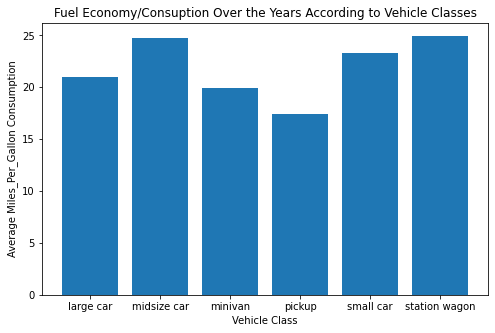

In [232]:
#plot for the most economical fuel class for classes that exists in both datasets

cmb_08_18.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(cmb_08_18.index, cmb_08_18)
plt.title("Fuel Economy/Consuption Over the Years According to Vehicle Classes")
plt.xlabel("Vehicle Class")
plt.ylabel("Average Miles_Per_Gallon Consumption");


##### The Plot above shows us that the most economical vehicle class over the years has proven to be the Station Wagon. 

##### Note that the higher the miles_per_gallon value, the better becasue that value tells us the number of miles that vehicle can make with one gallon of fuel. Hence its is important that the miles_per_gallon value of a vehicle is high for it to be considered as an economical vehicle.

##### In other words the Station Wagon vehicle class has the highest miles_per_gallon value hence, the reason why it is considerd to be the most economical vehicle class

### Question 2. Which of the veicle classes are most considered to be smartway vehicles ?

In [164]:
#filter out the rows/entries whose smartway value is "yes" and then check with the various vehicle class in 2008
v_smart_08 = df_08.query('smartway == "yes"').veh_class.value_counts()
v_smart_08

small car        177
midsize car       80
SUV               60
station wagon     34
large car         22
pickup             5
minivan            2
Name: veh_class, dtype: int64

In [166]:
#filter out the rows/entries whose smartway value is "yes" and then check with the various vehicle class in 2018
v_smart_18 = df_18.query('smartway == "Yes"').veh_class.value_counts()
v_smart_18

small car        36
midsize car      35
station wagon     9
large car         9
small SUV         2
Name: veh_class, dtype: int64

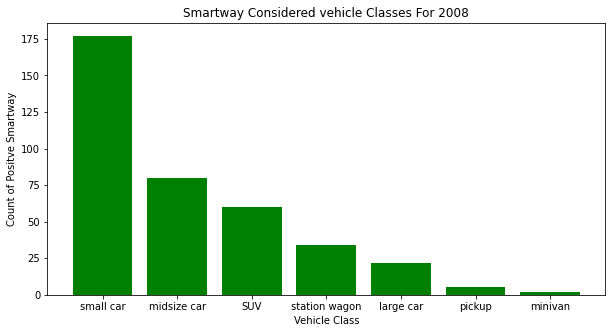

In [176]:
#plot for smartway considered vehicles for 2008
plt.subplots(figsize=(10, 5))
plt.bar(v_smart_08.index, v_smart_08, color = 'g')
plt.title("Smartway Considered vehicle Classes For 2008")
plt.xlabel("Vehicle Class")
plt.ylabel("Count of Positve Smartway");

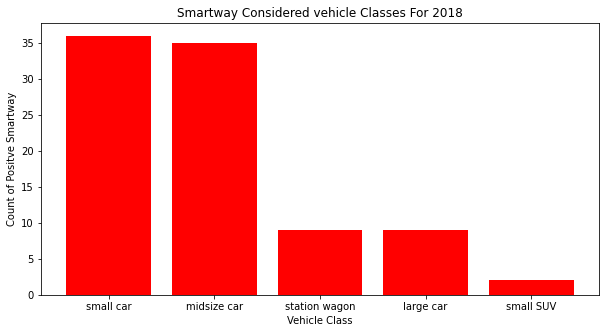

In [175]:
#plot for smartway considered vehicles for 2018
plt.subplots(figsize=(10, 5))
plt.bar(v_smart_18.index, v_smart_18, color = 'r')
plt.title("Smartway Considered vehicle Classes For 2018")
plt.xlabel("Vehicle Class")
plt.ylabel("Count of Positve Smartway");

In [167]:
#combining both to get the best picture of the most considered smartway vehicle class over the years
smart_08_18 = (v_smart_08 + v_smart_18)  #total
smart_08_18

SUV                NaN
large car         31.0
midsize car      115.0
minivan            NaN
pickup             NaN
small SUV          NaN
small car        213.0
station wagon     43.0
Name: veh_class, dtype: float64

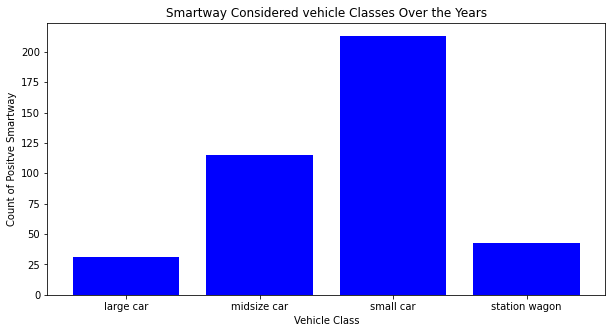

In [177]:
#plot for combined smartway considered vehicles over the years
smart_08_18.dropna(inplace=True)
plt.subplots(figsize=(10, 5))
plt.bar(smart_08_18.index, smart_08_18, color = 'b')
plt.title("Smartway Considered vehicle Classes Over the Years")
plt.xlabel("Vehicle Class")
plt.ylabel("Count of Positve Smartway");

##### The Plot above shows that the vehicle class that is considered to be the most smartway vehicle is the `Small Car`

##### Looking through the first plot that defines the vehicle class from 2008 and the second plot that defines the vehicle class from 2018 one thing is common and it is that the class of `Small Cars` dominates the sets as the most smartway considered vehicle class and this explains why it remained on top when we combined both datasets. 

##### Hence, if you are considering to buy a vehcle that is considered a smartway vehicle, go for a vehicle in the `Small Car` Class

## Question 3. Which range of air_pollution score must a vehicle attain to be considered a smartway vehicle?

In [178]:
#let's check for the mean air_poollution_score first
df_08.air_pollution_score.mean()

6.706180344478216

In [223]:
#check for the number of smartway  counts for scenarios when air_polution_score is lesser than the mean air_pollution_score in 2008
ap_smart_08_l = df_08.query('air_pollution_score < air_pollution_score.mean()').smartway.value_counts()
ap_smart_08_l

no     442
yes     60
Name: smartway, dtype: int64

In [224]:
#then we check for the number of smartway  counts for scenarios when air_polution_score is higher than the mean air_pollution_score in 2008
ap_smart_08_g = df_08.query('air_pollution_score > air_pollution_score.mean()').smartway.value_counts()
ap_smart_08_g

yes    320
no     165
Name: smartway, dtype: int64

##### We can see here from the 2008 dataset that we have more positively considered smartway vehicles when the air pollution score is above the average pollution score and we have less positively considered smartway vehicles when the air pollution score is below the average pollution score.

##### Let's Plot a Pie chart to show this

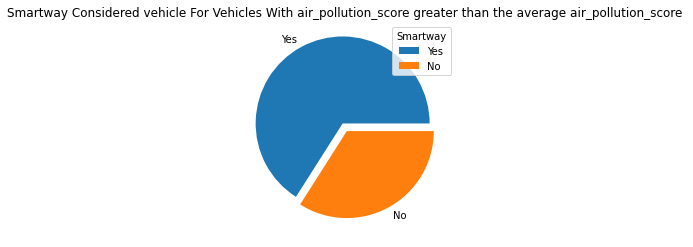

In [192]:
#plot for smartway considered vehicles where air_pollution_score is greater than the average air_pollution_score

mylabels = ["Yes", "No"]
myexplode = [0.1, 0]
plt.pie(ap_smart_08_g, labels = mylabels, explode = myexplode)
plt.title("Smartway Considered vehicle For Vehicles With air_pollution_score greater than the average air_pollution_score ");
plt.legend(title = "Smartway")
plt.show();

##### Lets have a look at the 2018 data set and compare and later combine them to get a better view and come up with an accrurate range of air_pollution_score  that a vehicle must have to be considered a smartway vehicle


In [197]:
df_18.air_pollution_score.mean()

3.9819711538461537

##### looking through this value, we see that the average score is quite low and according to the US department of energy, the air polution score score ranges from 0 to 10 hence this mean score will not give us an accurate analysis since its low so instead let's use the 75th percentile instead

In [202]:
df_18.air_pollution_score.quantile(0.75)

5.0

In [213]:
#check for the number of smartway  counts for scenarios when air_polution_score is lesser than the mean air_pollution_score in 2018
ap_smart_18_l = df_18.query('air_pollution_score < air_pollution_score.quantile(0.75)').smartway.value_counts()
ap_smart_18_l

No     444
Yes     39
Name: smartway, dtype: int64

In [214]:
#then we check for the number of smartway  counts for scenarios when air_polution_score is higher than the mean air_pollution_score in 2018
ap_smart_18_g = df_18.query('air_pollution_score > air_pollution_score.quantile(0.75)').smartway.value_counts()
ap_smart_18_g

No       99
Yes      37
Elite    17
Name: smartway, dtype: int64

#### It seems there is and uneven distribution between positively and negatively considered smartway vehicles in the 2018 dataset let's confirm this by checking the distribution 

In [226]:
df_18.smartway.value_counts()

No       724
Yes       91
Elite     17
Name: smartway, dtype: int64

##### Just as suspected, there is an uneven distribution between the three classes so it will be best to use proportions instead of counts. It seems the 2018 dataset on its own will not be able answer our question so we will stick to the result we obtained from the 2008 dataset

##### Hence, the range of air_pollution_score  that a vehicle must attain to be considered a smartway vehicle is between `6.71 - 10`

## Question 4. What  number of cylinders is most considered to make a vehicle an economical vehicle? 

In [234]:
#group by the various cylinder size and check the the average combined_miles_per_gallon consuption for each cylinder count for the 2008 dataset
cyl_08 = df_08.groupby('cyl').cmb_mpg.mean()
cyl_08

cyl
2     18.500000
4     24.120141
5     22.354167
6     19.356098
8     15.452261
10    14.071429
12    12.566667
16    10.000000
Name: cmb_mpg, dtype: float64

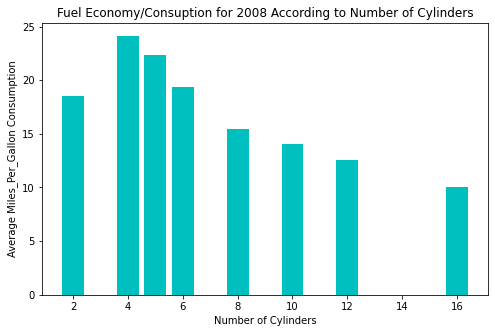

In [241]:
# let's plot this to have a clearer insight

plt.subplots(figsize=(8, 5))
plt.bar(cyl_08.index, cyl_08, color ='c')
plt.title("Fuel Economy/Consuption for 2008 According to Number of Cylinders")
plt.xlabel("Number of Cylinders")
plt.ylabel("Average Miles_Per_Gallon Consumption");

##### From the plot above, it is glaring that vehicles with 4 cylinders are considered to be the most economical vehicles.

##### Let's take a look at the 2018 dataset and see if the assumption remains

In [236]:
#group by the various cylinder size and check the the average combined_miles_per_gallon consuption for each cylinder count for the 2018 dataset
cyl_18 = df_18.groupby('cyl').cmb_mpg.mean()
cyl_18

cyl
3     32.000000
4     28.739474
5     22.000000
6     21.207031
8     17.327273
12    13.444444
16    11.000000
Name: cmb_mpg, dtype: float64

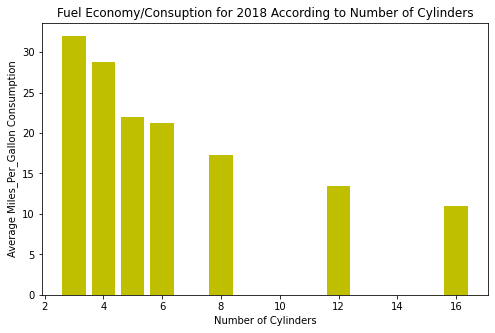

In [242]:
# let's plot this to have a clearer insight

plt.subplots(figsize=(8, 5))
plt.bar(cyl_18.index, cyl_18, color ='y')
plt.title("Fuel Economy/Consuption for 2018 According to Number of Cylinders")
plt.xlabel("Number of Cylinders")
plt.ylabel("Average Miles_Per_Gallon Consumption");

##### From the plot above, it is glaring that vehicles with 2 cylinders are considered to be the most economical vehicles.

##### From the look of things, it seems like the lower the number of cylinders, the more economical the vehicle will be.

##### Let's combime both years  and see the level of consuption in a better view



In [239]:
#lets get get averae of the result for both years
cyl_new = (cyl_08 + cyl_18) / 2 #average of both results
cyl_new

cyl
2           NaN
3           NaN
4     26.429808
5     22.177083
6     20.281564
8     16.389767
10          NaN
12    13.005556
16    10.500000
Name: cmb_mpg, dtype: float64

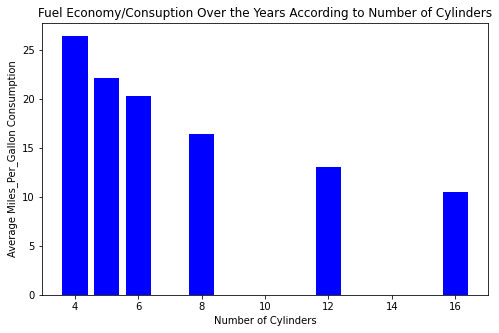

In [266]:
# let's plot this to have a clearer insight

cyl_new.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(cyl_new.index, cyl_new, color = 'b')
plt.title("Fuel Economy/Consuption Over the Years According to Number of Cylinders")
plt.xlabel("Number of Cylinders")
plt.ylabel("Average Miles_Per_Gallon Consumption");

##### From the plot above, it shows that over the years, engines with `4 cylinders` have shown dominance when it comes to economizing fuel cinsuption in vehicles and that cannot be debated. 

##### So To answer the question, engines with `4` cylinders are your best bet when fuel economy is a priority in your specification list when considering to buy a vehicle.

##### On a more general note, this data has shown us that the lesser the numer of cylinders, the more the vehicle is able to conserve fuel. Therefore speaking genrally, any engine with `4 cylinders and less` are most considered to make a vehicle an economical vehicle

## Question 5: Are more unique models using alternative sources of fuel? By how much?


##### Let's first look at what the sources of fuel are and which ones are alternative sources.

In [267]:
#checks for the unique values in the fuel column for 2008
df_08.fuel.value_counts()

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [268]:
#checks for the unique values in the fuel column for 2018
df_18.fuel.value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

##### It seems  the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity. 

In [272]:
# how many unique models used alternative sources of fuel in 2008
fu_alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
fu_alt_08

2

In [273]:
# how many unique models used alternative sources of fuel in 2018
fu_alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
fu_alt_18

26

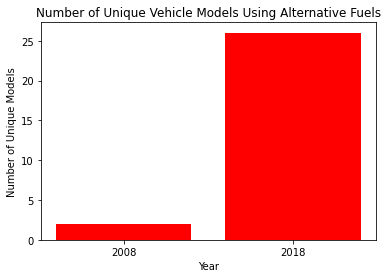

In [274]:
#let's plot this observation
plt.bar(["2008", "2018"], [fu_alt_08, fu_alt_18], color = 'r')
plt.title("Number of Unique Vehicle Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

#### Since 2008, the number of unique models using alternative sources of fuel increased by 24.

## Question 6: How much have vehicle classes improved in fuel economy?  


Let's look at the average fuel economy for each vehicle class for both years.


In [275]:
veh_class_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_class_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [276]:
veh_class_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_class_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [277]:
# how much they've increased by for each vehicle class
increase = veh_class_18 - veh_class_08
increase

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

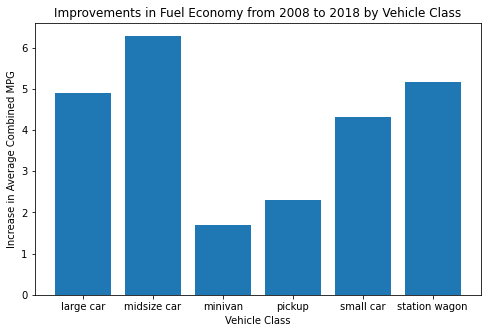

In [278]:
# let's plot the classes that exist in both years
increase.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(increase.index, increase)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

#### We can see here that the Vehicle class that has improved the most in fuel economy is the Midsize car and if you recall from `question 2` that Midsize cars came up as the second most economical car taking an average of the fuel comsumption of all the vehicle classes over the years.

#### They have  maintained that reputaion over the years and with the way in which they are going, they do not look like they are stopping anytime soon. They are definitely a great choice for an economical vehicle.

#### On a final note, let's take a look at all the insights collected from these data sets which we worked on

#### We discovered that;

##### 1. the most economical vehicle class over the years has proven to be the `Station Wagon`. 

##### 2. The vehicle class that is considered to be the most smartway vehicle is the `Small Car`. Hence, if you are considering to buy a vehcle that is considered a smartway vehicle, go for a vehicle in the `Small Car` Class. In addition to this, we discovered that the `Midsize class` vehicles too have a great reputation of fuel economy and they have maintained that reputation over the years and as such, they are also a great class of vehicle to consider  as far as fuel economy is concerned.

##### 3. The range of air_pollution_score  that a vehicle must attain to be considered a smartway vehicle is between `6.71 - 10`

##### 4. Engines with `4 cylinders` have shown dominance when it comes to economizing fuel cinsuption in vehicles. Generally,  any vehicle engine  with `4 cylinders and less` are most considered to make a vehicle an economical vehicle

##### 5. Since 2008, the number of unique models using alternative sources of fuel increased by 24.
